# Seaborn Tutorial

In [2]:
# Start writing code here...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [4]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Distribution Plot

/opt/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not_distracted'>

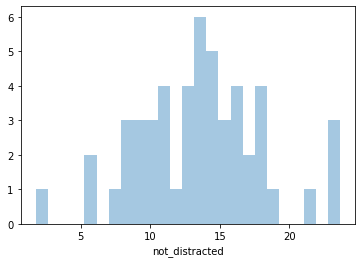

In [5]:
sns.distplot(crash_df['not_distracted'], kde = False, bins=25)

## Joint Plot

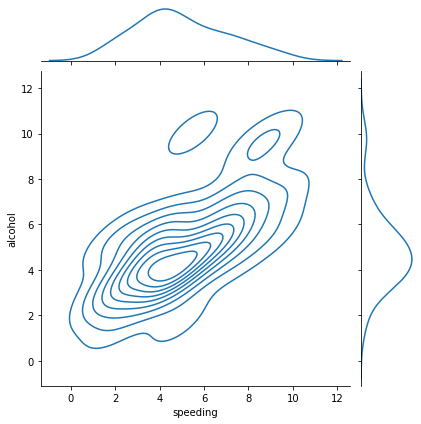

In [6]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'kde') #replace kind value is 'reg', 'kde','hex'

## KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

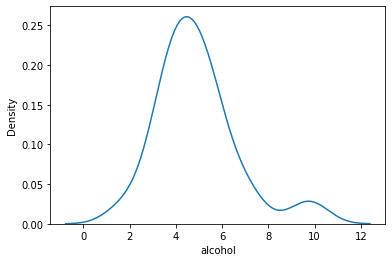

In [7]:
sns.kdeplot(crash_df['alcohol'])

## Pair Plots

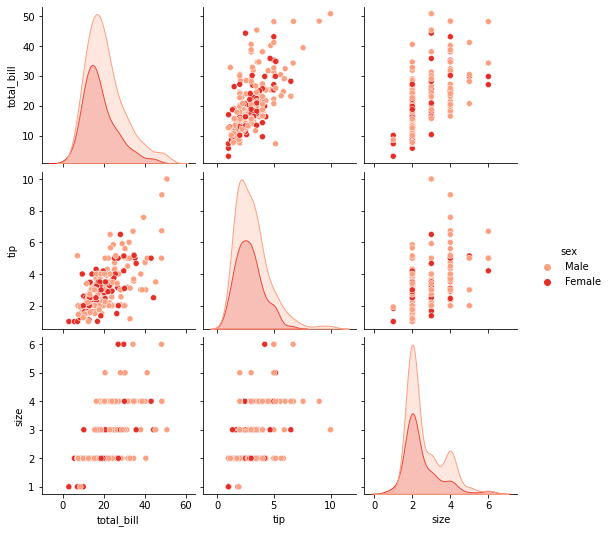

In [8]:
# Pair Plots
tips_df = sns.load_dataset('tips')

sns.pairplot(tips_df, hue='sex',palette='Reds')

## Rug Plots

<AxesSubplot:xlabel='tip'>

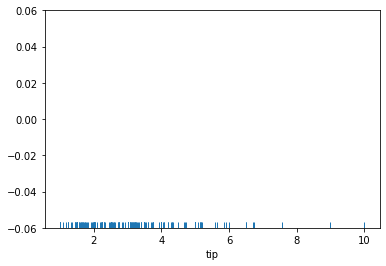

In [9]:
# Rug plot
sns.rugplot(tips_df['tip'])

## Styling

<Figure size 576x288 with 0 Axes>

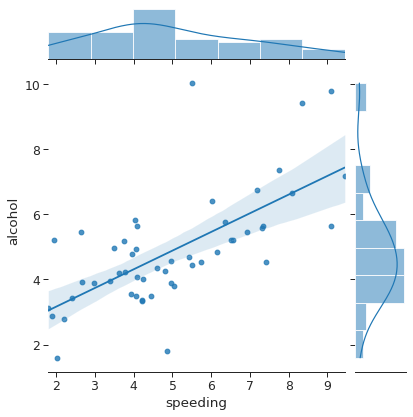

In [10]:
# styling

sns.set_style('ticks')
plt.figure(figsize=(8,4))
sns.set_context('paper', font_scale= 1.4)# replace paper to 'poster' or 'talk'

sns.jointplot(x='speeding', y= 'alcohol', data= crash_df, kind='reg')

sns.despine(left = True)#remove axis line

## Bar plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

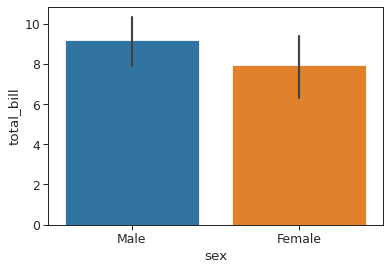

In [12]:
#Bar Plots

sns.barplot(x='sex', y='total_bill',data = tips_df, estimator=np.std)

## Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

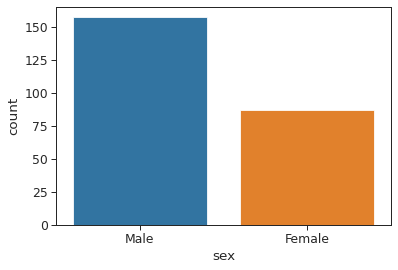

In [13]:
#count plot

sns.countplot(x='sex',data=tips_df)

## Box Plot

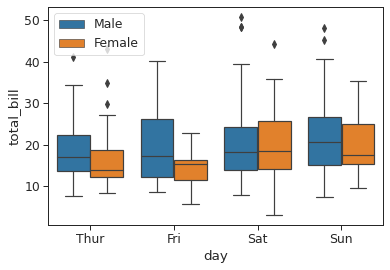

In [15]:
#box plot
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

plt.legend(loc= 0)

## Violin plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

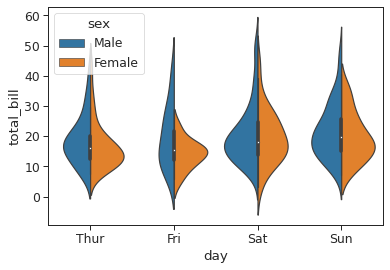

In [16]:
#violin plot
sns.violinplot(x='day', y='total_bill',data=tips_df, hue='sex', split= True)

## Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

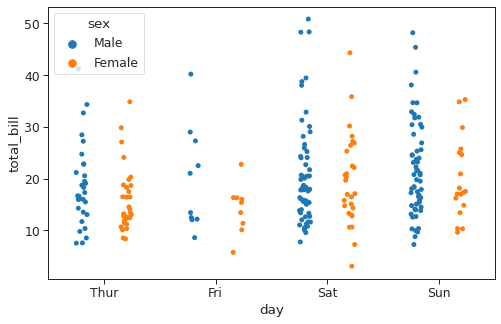

In [21]:
#Strip plot

plt.figure(figsize=(8,5))
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True,hue='sex', dodge=True)

## Swarm Plot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

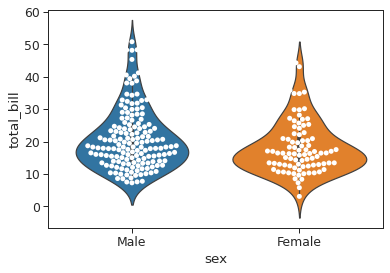

In [24]:
#swarm plot

sns.violinplot(x='sex',y='total_bill', data=tips_df)
sns.swarmplot(x='sex',y='total_bill', data=tips_df, color='white')

## Palettes

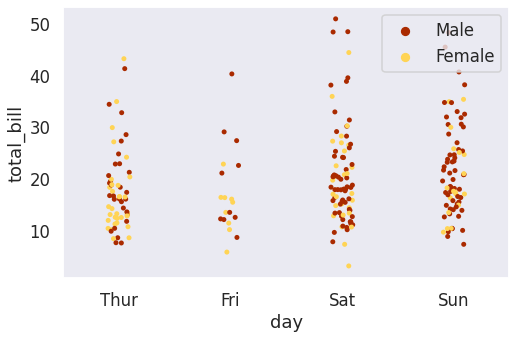

In [29]:
#palettes

plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')
plt.legend(loc=1)

## Matrix Plots

<AxesSubplot:>

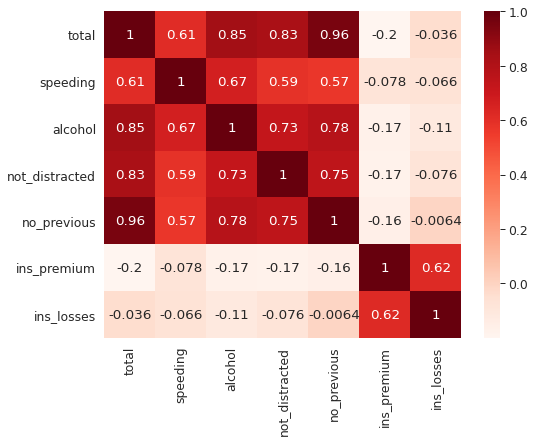

In [34]:
#Matrix plots
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

crash_mx= crash_df.corr()
sns.heatmap(crash_mx, annot=True, cmap='Reds' )

<AxesSubplot:xlabel='year', ylabel='month'>

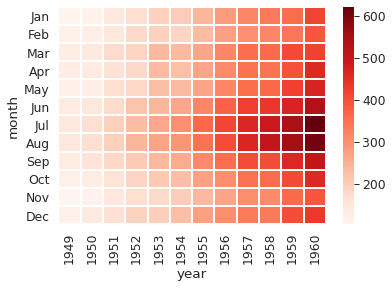

In [37]:
flights =sns.load_dataset('flights')
flights = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
sns.heatmap(flights, cmap='Reds', linecolor='white', linewidth=1)

## Cluster Map

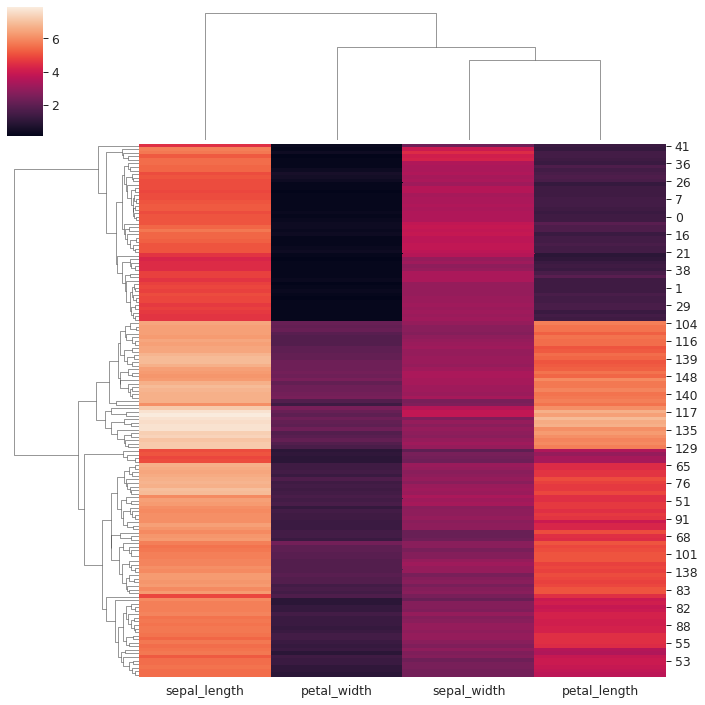

In [38]:
#cluster map
iris = sns.load_dataset('iris')
species = iris.pop('species')
sns.clustermap(iris)

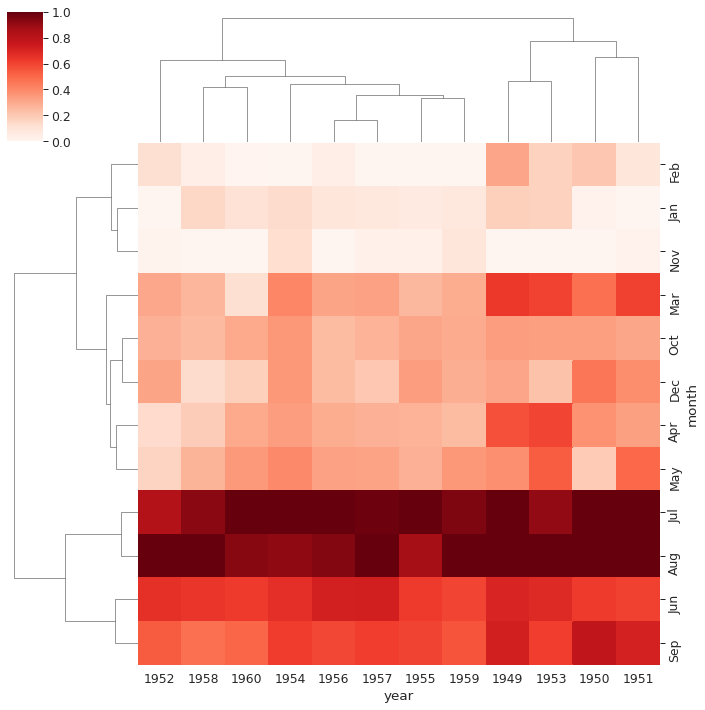

In [39]:
sns.clustermap(flights, cmap='Reds', standard_scale=1)

## Pair Grid

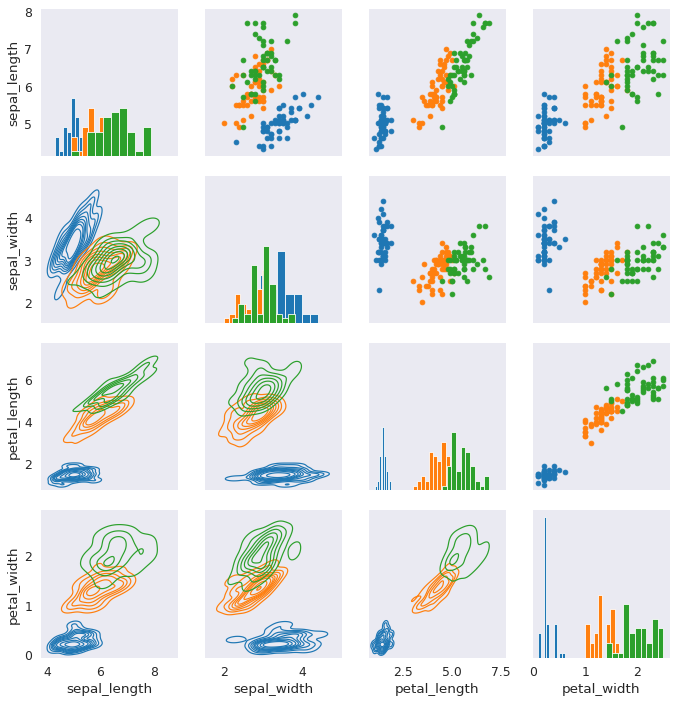

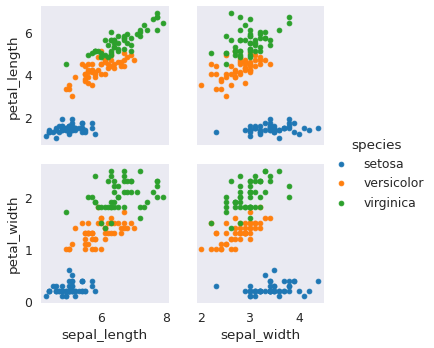

In [50]:
#pairGrid
iris= sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
# iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)
# iris_g.map_offdiag(plt.scatter)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)
iris_g=sns.PairGrid(iris, hue='species',
x_vars= ['sepal_length','sepal_width'],
y_vars= ['petal_length','petal_width'])

iris_g.map(plt.scatter)
iris_g.add_legend()

## Facet Grid

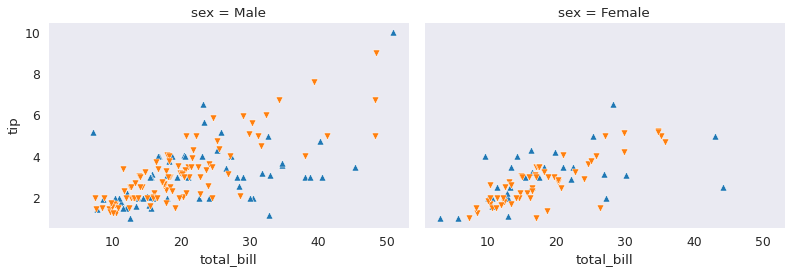

In [56]:
#Facet Grid

# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker', height=4, aspect=1.3,
# col_order=['Dinner', 'Lunch'], palette='Set1')

# tips_fg.map(plt.scatter, 'total_bill','tip')

kws = dict(s=50, linewidth=.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col='sex',hue='smoker', height=4, aspect=1.4,
hue_order=['Yes', 'No'],
hue_kws= dict(marker=['^', 'v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)


## Regression Plots

<Figure size 576x432 with 0 Axes>

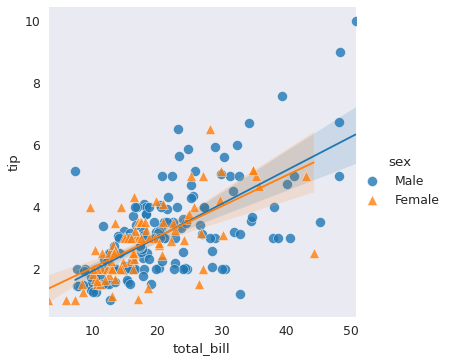

In [58]:
#Regression plots

plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill',y='tip',hue='sex', data=tips_df,markers=['o','^'],
scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'})